<a href="https://colab.research.google.com/github/tgrappoport/2dmat/blob/master/5_optcond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical conductivity with Kite

Example of optical conductivity of graphene with Gaussian disorder with Kite. This calculation can take a bit of a time

In [1]:
%%capture --no-display
!pip install h5py==3.8.0
!pip install -i https://test.pypi.org/simple/ pybinding quantum-kite==0.0.3a

In [2]:
import numpy as np
from math import sqrt, pi
import pybinding as pb
import kite
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# seaborn setting
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})


In [3]:


from pybinding.repository import graphene


lattice = graphene.monolayer()

    # add Disorder
disorder = kite.Disorder(lattice)
disorder.add_disorder('B', 'Gaussian', 0.0, 0.4)
disorder.add_disorder('A', 'Gaussian', 0.0, 0.4)

    # number of decomposition parts [nx,ny] in each direction of matrix.
    # This divides the lattice into various sections, each of which is calculated in parallel
nx = ny = 2
    # number of unit cells in each direction.
lx = ly = 256

    # make config object which caries info about
    # - the number of decomposition parts [nx, ny],
    # - lengths of structure [lx, ly]
    # - boundary conditions [mode,mode, ... ] with modes:
    #   . "periodic"
    #   . "open"
    #   . "twisted" -- this option needs the extra argument angles=[phi_1,..,phi_DIM] where phi_i \in [0, 2*M_PI]
    #   . "random"

    # Boundary Mode
mode = "periodic"

    # - specify precision of the exported hopping and onsite data, 0 - float, 1 - double, and 2 - long double.
    # - scaling, if None it's automatic, if present select spectrum_range=[e_min, e_max]
configuration = kite.Configuration(
        divisions=[nx, ny],
        length=[lx, ly],
        boundaries=[mode, mode],
        is_complex=False,
        precision=1,
        spectrum_range=[-10, 10]
)

    # specify calculation type
calculation = kite.Calculation(configuration)
calculation.dos(
        num_points=2000,
        num_moments=512,
        num_random=10,
        num_disorder=1
)
    # require the calculation conductivity_optical (xx)
calculation.conductivity_optical(
        num_points=1000,
        num_disorder=1,
        num_random=10,
        num_moments=256,
        direction='xx'
)

    # configure the *.h5 file
output_file = "optcond_gaussian_disorder-output.h5"
kite.config_system(lattice, configuration, calculation, filename=output_file,
                       disorder=disorder)


##############################################################################
#                        KITE | Release  1.1                                 #
#                        Kite home: quantum-kite.com                         #
#                                                                            #
#                        Copyright 2022, KITE                                #
##############################################################################

##############################################################################

SCALING:


Manual scaling is chosen. 


##############################################################################

BOUNDARY CONDITIONS:


Boundary conditions along the lattice vectors are set to:
 
a1: Periodic     a2: Periodic 


##############################################################################

DECOMPOSITION:


Chosen number of decomposition parts is: [2, 2] .
INFO: this product will correspond to the total number of thre

Using very similar Kubo formula, we can calculate the optical conductivity. If nothing is defined, the Fermi energy of the calculation is zero. The value of the Fermi energy for a given calculation and the temperature can be changed in the postprocessing part, without the need to recalculate everything.


In [4]:
kite.execute.kitex("optcond_gaussian_disorder-output.h5");
#postprocessing the output file. Check kite documentation to know the names of
#postprocessed files


<HDF5 dataset "IS_COMPLEX": shape (), type "<u4">


In [5]:
kite.execute.kitetools("optcond_gaussian_disorder-output.h5 --CondOpt -F 1.0 -O 0 10 4000 -N optcond1.0dat");

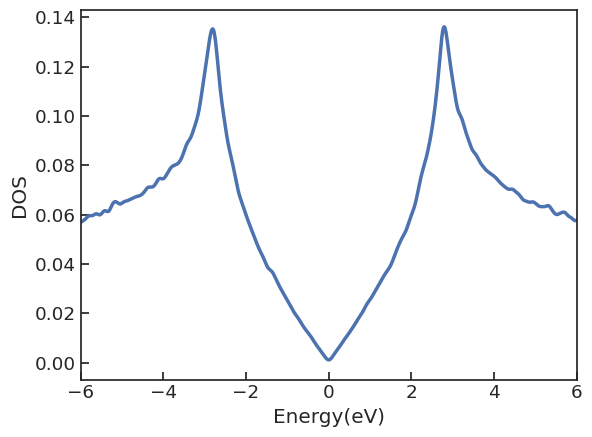

In [6]:
dos=np.loadtxt("dos.dat",dtype=float)
plt.plot(dos[:,0],dos[:,1])
plt.xlabel("Energy(eV)")
plt.ylabel("DOS")
plt.xlim(-6,6)
#plt.ylim(0,0.08)
plt.show()

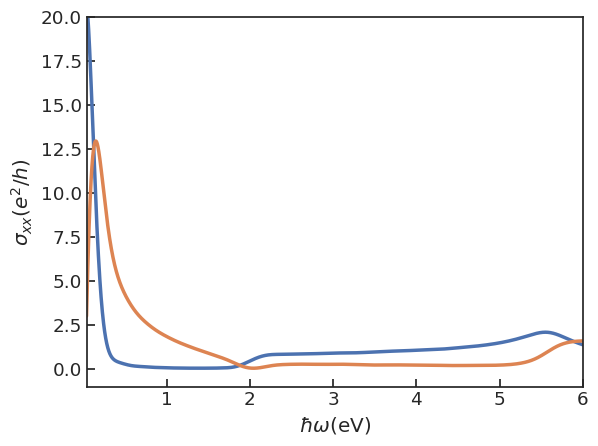

In [7]:

optcond=np.loadtxt("optcond1.0dat",dtype=float)
plt.plot(optcond[:,0],optcond[:,1])
plt.plot(optcond[:,0],optcond[:,2])
plt.xlabel("$\hbar\omega$(eV)")
plt.ylabel("$\sigma_{xx}$($e^2/h$)")
plt.xlim(0.04,6)
plt.ylim(-1,20)
plt.show()